In [1]:
from library_analysis_old import *
from library_vna import *
from library_power_supply import *
from library_misc import *

from matplotlib import pyplot as plt
import numpy as np

# Damping analysis

In [2]:
user = "MoNiFe"
# measurement = "MoNiFe 25nm ref giusta field sweep"
measurement = "M210__2024_02_27__postHF_FS"

In [3]:
settings = load_metadata(user, measurement)
freq, fields, amplitudes, phases = load_measurement(user, measurement)

[traces, Us] = analysisFMR(freq, fields, amplitudes, phases, show_plots=False)

In [4]:
traces_field = []
for i in range(settings["number_of_points"]):
    traces_field.append(traces[1:,i])
traces_field=np.array(traces_field)

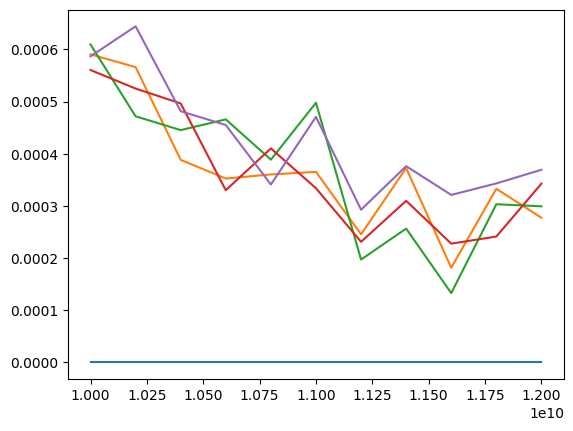

In [5]:
for i in range(5):
    plt.plot(freq,traces[i,:])

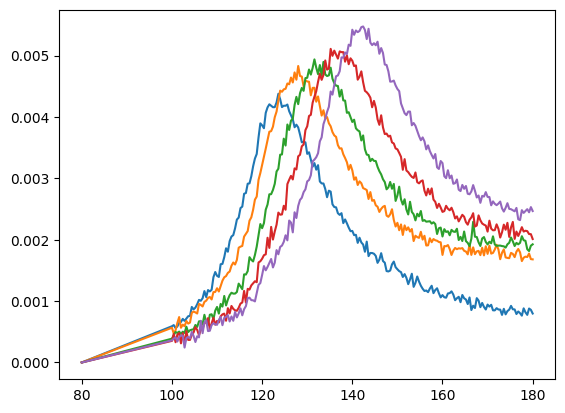

In [6]:
for i in range(5):
    plt.plot(fields,traces[:,i])

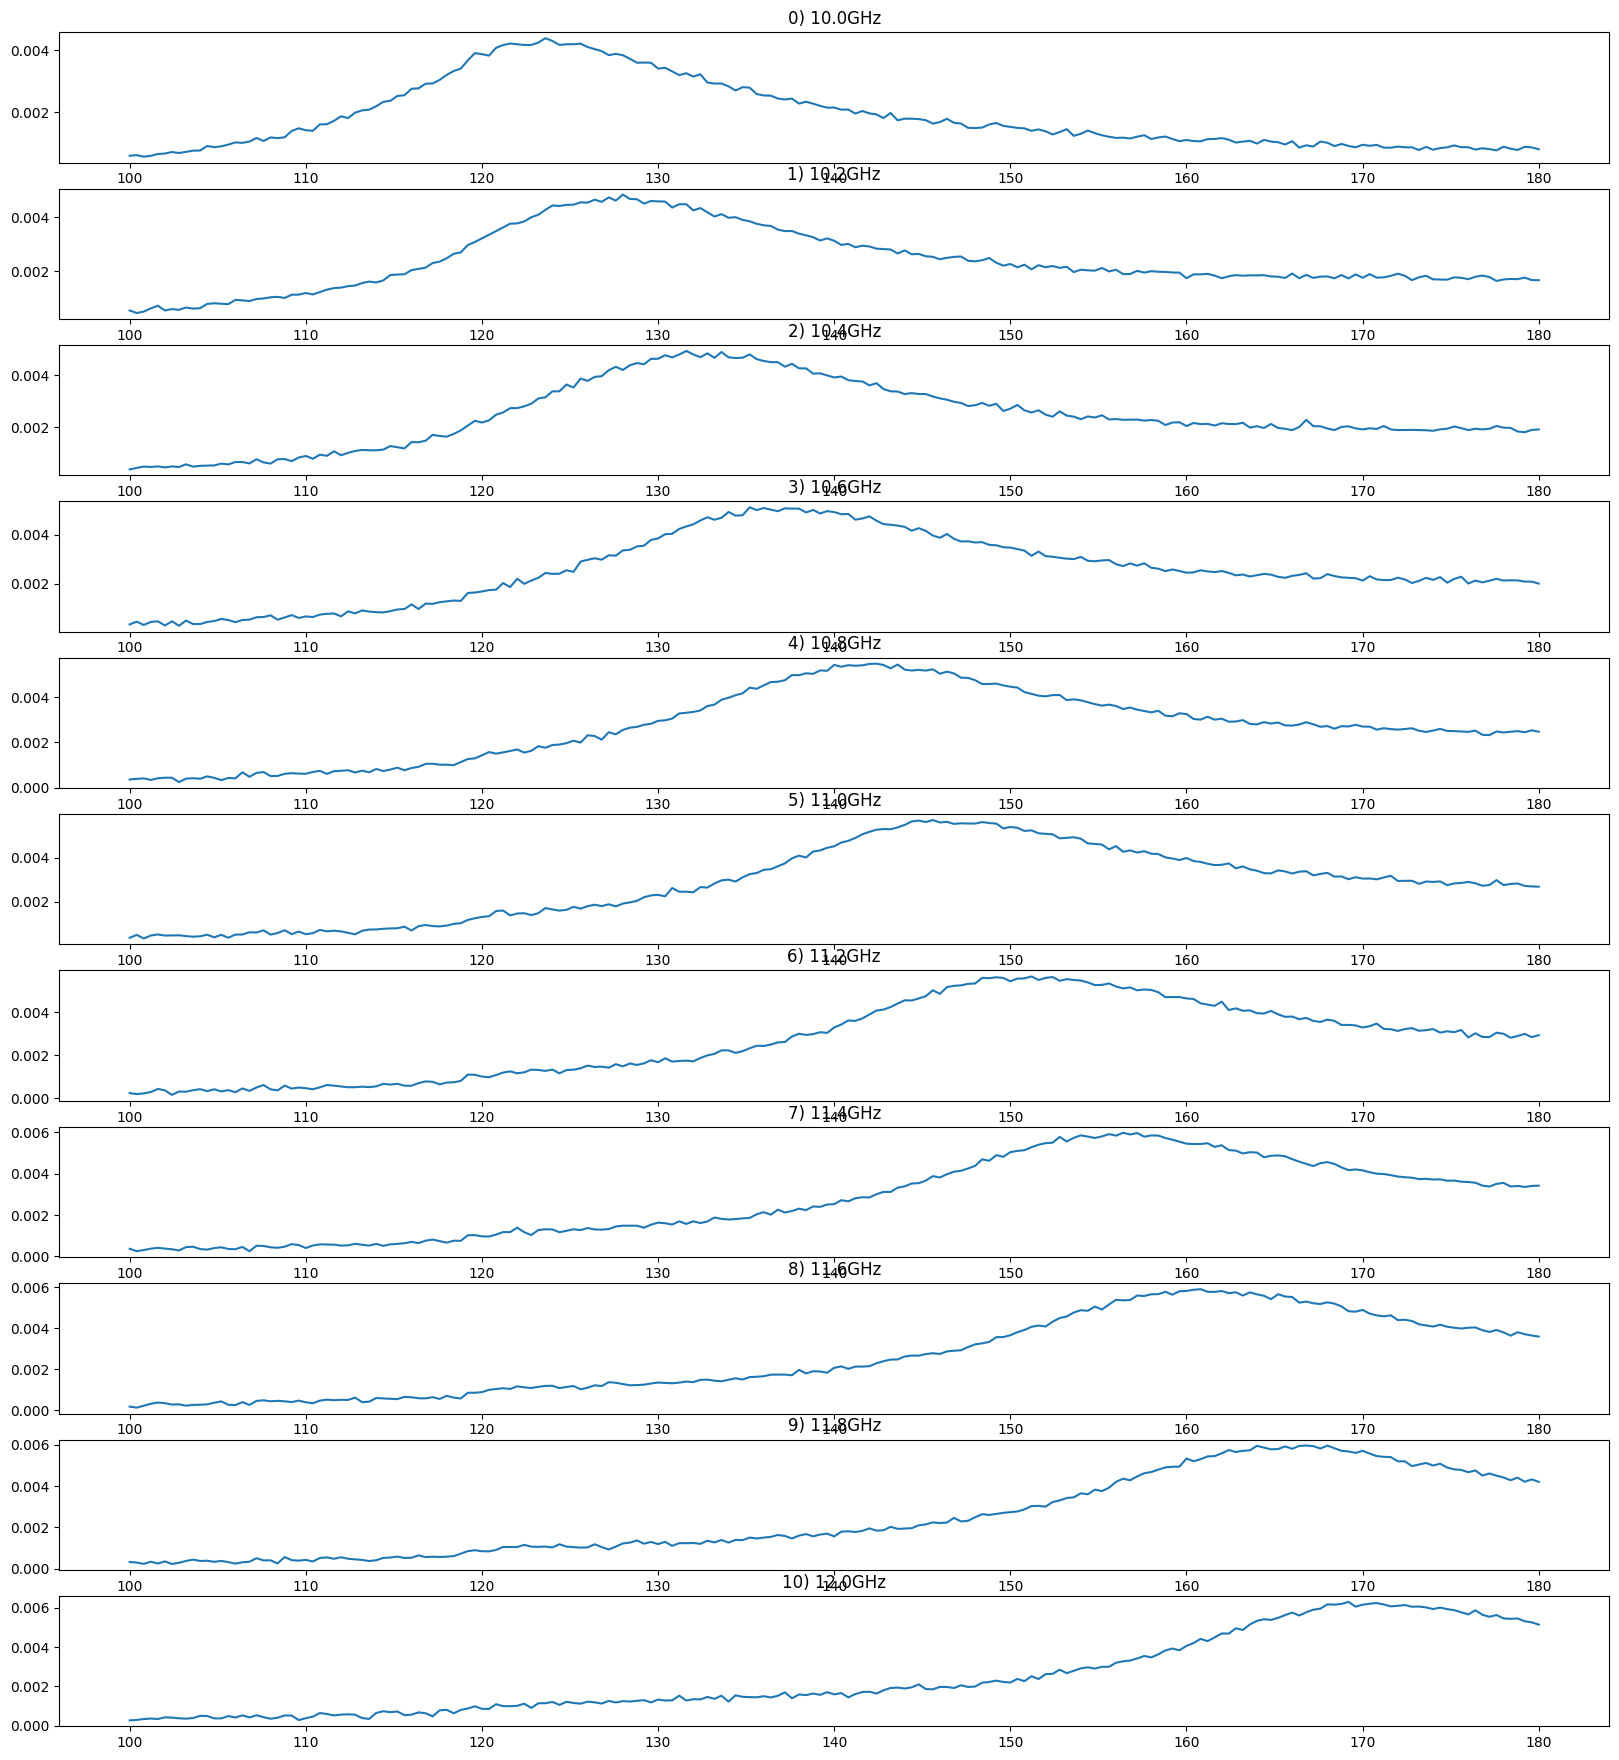

In [7]:
plt.figure(figsize=(20,settings["number_of_points"]*2))
for n in range(settings["number_of_points"]):
    plt.subplot(settings["number_of_points"],1,n+1)
    plt.plot(fields[1:], traces_field[n,:])
    plt.title(str(n) + ") " + f"{freq[n]/10**9:.4}" + "GHz")
traces_field = np.array(traces_field)

In [ ]:
field_peaks = []
for trace in traces_field:
    max_ind = np.argmax(trace)
    field_peaks.append(fields[max_ind])

NameError: name 'getFWHMFitted' is not defined

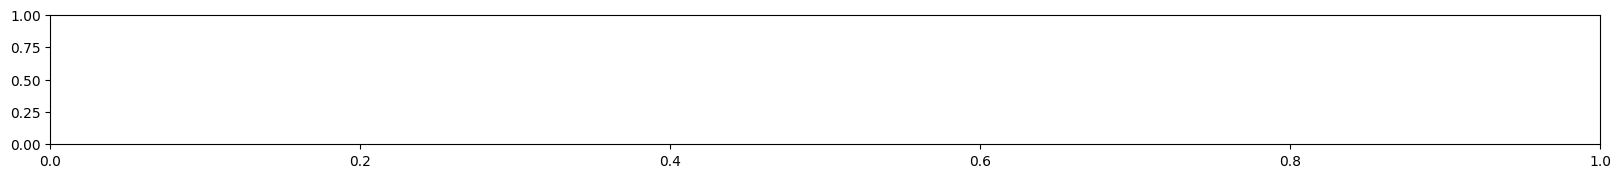

In [ ]:
# for trace in traces:
#U must be used or the fit won't work ----> la Lorentziana usata per fittare ha fondo nullo, se non normalizzi riportando il fondo a zero (come si fa nel calcolo di U) la curva non fitta
g = 1.7e11
mu0 = 4e-7 * np.pi
conversion = 795.7747 #the field needs to be transformed in A/m before being used
alpha = np.zeros((len(traces_field),1))
field_width = np.zeros((len(traces_field),1))

plt.figure(figsize=(20,settings["number_of_points"]*2))
for i in range(1,len(traces_field),1):
    plt.subplot(settings["number_of_points"],1,i+1)
    width = getFWHMFitted(fields[1:], traces_field[i,:], field_peaks[i])
    width = np.array(width)
    plt.title(str(i) + ") " + f"{freq[i]/10**9:.4}" + "GHz")
    print(f"{i}) FWHM: \t" + str(width[0]))

    alpha[i] = conversion*(width*g*mu0)/(4*np.pi*freq[i])
    #alpha[i] = (g*mu0*conversion*width)/(2*freq[i]/(2*np.pi)) 
    print(f"{i}) Alpha: \t{alpha[i][0]}")


In [ ]:
alpha_sum = 0

for i in range(len(traces_field)):
    alpha_sum += alpha[i]

alpha_final = alpha_sum/len(traces_field)
print(alpha_final)

[0.00789214]
